,geometry,USPRSDFL,USPRSR,SUM_USPRST,FID
District,,,,,
0,"POLYGON ((490620.7122 4974882.8421, 490413.543...",205263.0,139418.0,377839.0,686663.0
1,"(POLYGON ((481486.3530999999 4977835.9541, 481...",184718.0,159206.0,377268.0,667365.0
2,(POLYGON ((349629.3946000002 5264533.610400001...,180980.0,162052.0,376800.0,1089310.0
3,"POLYGON ((505691.2893000003 4816314.931, 50408...",193555.0,149177.0,377198.0,907508.0
4,(POLYGON ((500178.8788000001 4963566.319700001...,190258.0,153995.0,377661.0,603416.0
5,(POLYGON ((438134.6990999999 4939196.900900001...,206778.0,136312.0,376082.0,626024.0
P0,"POLYGON ((479404.7600999996 5121380.9899, 4793...",120155.0,229929.0,378385.0,1776976.0
P1,"(POLYGON ((439063.6299999999 4939517.9702, 439...",104969.0,244261.0,379259.0,1124608.0


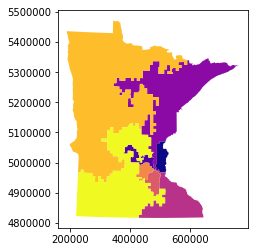

In [38]:
import geopandas
import matplotlib
#After gerrymandering, the data has 8 districts. 
#We use Geopandas library to dissolve by district field. And create a new ESRI Shapefile.
map1 = geopandas.read_file('district maps\district_map18\district_map18.shp') #reads shapefile
map1=map1.rename(index=str, columns={'SUM_USPRSR':'USPRSR', 'SUM_USPRSD':'USPRSDFL'}) #changes field names to have the same field names as other files have.
mapdiss = map1.dissolve(by='District',aggfunc='sum')
#mapdiss.to_file(filename=r'C:\Users\Meric Birol\Documents\district maps\dissolved\district_map18_diss.shp', driver='ESRI Shapefile')
mapdiss.plot(colormap='plasma')
mapdiss.head(10)

In [40]:
#Efficiency gap is being used for measuting Gerrymandering quality. Wasted votes are bases of the function. 
import fiona
shapeFiles= [
            "district maps\dissolved/district_map1_diss.shp",
            "district maps\dissolved/district_map2_diss.shp",
            "district maps\dissolved/district_map3_diss.shp",
            "district maps\dissolved/district_map4_diss.shp",
            "district maps\dissolved/district_map5_diss.shp",
            "district maps\dissolved/district_map6_diss.shp",
            "district maps\dissolved/district_map7_diss.shp",
            "district maps\dissolved/district_map8_diss.shp",
            "district maps\dissolved/district_map9_diss.shp",
            "district maps\dissolved/district_map10_diss.shp",
            "district maps\dissolved/district_map11_diss.shp",
            "district maps\dissolved/district_map12_diss.shp",
            "district maps\dissolved/district_map13_diss.shp",
            "district maps\dissolved/district_map14_diss.shp",
            "district maps\dissolved/district_map15_diss.shp",
            "district maps\dissolved/district_map16_diss.shp",
            "district maps\dissolved/district_map17_diss.shp",
            "district maps\dissolved/district_map18_diss.shp",
            ]
MapNumber=0

for i in shapeFiles: #iterates through every item in the list
    fh=fiona.open(i,'r') #opens a shapefile at a time and loops through
    TotalWastedDemocrat=0
    TotalWastedRep=0
    TotalVotes=0
    MapNumber+=1
    print('Map:', MapNumber) #prints map number
    for f in fh:
        repVotes = f['properties']['USPRSR'] #get the republican votes
        demVotes = f['properties']['USPRSDFL'] #get the democrat votes
        totVotes = repVotes + demVotes #total votes by precints of Democrat and Republican Party
        TotalVotes=TotalVotes+totVotes #overall total votes (Republican+Democrat)
        if repVotes > demVotes: #if republican won
            wastedRVotes = int(( (repVotes - demVotes)/2) - 1) #wasted republican votes
            wastedDVotes = demVotes #wasted democrat votes
        elif demVotes > repVotes: #if democrat won
            wastedDVotes = int(( (demVotes - repVotes)/2) - 1) #wasted democrat votes
            wastedRVotes = repVotes #wasted republican votes
        TotalWastedDemocrat=TotalWastedDemocrat+wastedDVotes # total wasted votes by democrats
        TotalWastedRep=TotalWastedRep+wastedRVotes #total wasted votes by republicans
    fh.close # Close the file
    effGap=((TotalWastedDemocrat - TotalWastedRep)/TotalVotes)*100 #overall efficiency gap (percentage)
    if TotalWastedDemocrat>TotalWastedRep:
        print('Efficiency gap is in favor of Republicans')
    else:
        print('Efficiency gap is in favor of Democrats')
    print('%',effGap)

Map: 1
Efficiency gap is in favor of Republicans
% 26.511214029399998
Map: 2
Efficiency gap is in favor of Republicans
% 26.511214029399998
Map: 3
Efficiency gap is in favor of Republicans
% 27.136669842615476
Map: 4
Efficiency gap is in favor of Republicans
% 26.615133855440444
Map: 5
Efficiency gap is in favor of Republicans
% 26.511214029399998
Map: 6
Efficiency gap is in favor of Republicans
% 26.648879863466483
Map: 7
Efficiency gap is in favor of Republicans
% 26.955350232162107
Map: 8
Efficiency gap is in favor of Republicans
% 26.955350232162107
Map: 9
Efficiency gap is in favor of Republicans
% 25.238438267526135
Map: 10
Efficiency gap is in favor of Republicans
% 27.37196087156331
Map: 11
Efficiency gap is in favor of Republicans
% 0.07666215481778561
Map: 12
Efficiency gap is in favor of Republicans
% 1.7302464799486883
Map: 13
Efficiency gap is in favor of Republicans
% 14.23474408532302
Map: 14
Efficiency gap is in favor of Republicans
% 38.66260770973368
Map: 15
Efficienc